<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Exploratory Data Analysis
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem Statement

The Zomato exploratory data analysis aims to assist food enthusiasts in discovering the best restaurants and value-for-money options within their locality. It facilitates locating desired cuisines available nearby. With a dataset encompassing restaurant details like establishment type, address, city, locality, and cuisine offerings, alongside attributes such as average cost for two, price range, and aggregate ratings, the objective is to uncover insights into restaurant preferences and dining trends. Through analyzing factors like average cost, ratings, and customer engagement metrics such as votes and photo counts, this study seeks to provide actionable recommendations for diners seeking satisfying dining experiences.

## Data Definition

**res_id**: The code given to a restaurant (Categorical)

**name**: Name of the restaurant (Categorical)

**establishment**: Represents the type of establishment (Categorical)

**url**: The website of the restaurant (Categorical)

**address**: The address of the restaurant (Categorical)

**city**: City in which the restaurant located (Categorical)

**city_id**: The code given to a city (Categorical)

**locality**: Locality of the restaurant (Categorical)

**latitude**: Latitude of the restaurant (Categorical)

**longitude**: Longitude of the restaurant (Categorical)

**zipcode**: Zipcode of the city in which the restaurant located (Categorical)

**country_id**: Country code in which the restaurant located (Categorical)

**locality_verbose**: Locality along with the city in which the restaurant located (Categorical)

**cuisines**: The cuisines a restaurant serves (Categorical)

**timings**: The working hours of a restaurant (Categorical)

**average_cost_for_two**: The average amount expected for 2 people (Numerical)

**price_range**: The categories for average cost (Categories - 1,2,3,4) (Categorical)

**currency**: The currency in which a customer pays (Categorical)

**highlights**: The facilities of the restaurant (Categorical)

**aggregate_rating**: The overall rating a restaurant has got (Numerical)

**rating_text**: Categorized ratings (Categorical)

**votes**: Number of votes received by the restaurant from customers (Numerical)

**photo_count**: The number of photos of a restaurant (Numerical)

**opentable_support**: Restaurant reservation from Opentable (Categorical)

**delivery**: The restaurant deliver an order or not (Categorical)

**takeaway**: The restaurant allows  a 'takeaway' of an order or not (Categorical)

## Icon Legends
<table>
  <tr>
    <th width="25%"> <img src="infer.png" style="width:25%;"></th>
    <th width="25%"> <img src="alsoreadicon.png" style="width:25%;"></th>
    <th width="25%"> <img src="todo.png" style="width:25%;"></th>
    <th width="25%"> <img src="quicktip.png" style="width:25%;"></th>
  </tr>
  <tr>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Inferences from Outcome</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Additional Reads</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Lets do it</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Quick Tips</b></font></div>
    </td>

</tr>

</table>


## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Understand  and Prepare the Data](#Understand_Data)**
5. **[Understand the variables](#Understanding_variables)**
6. **[Check for Missing Values](#missing)**
7. **[Study Correlation](#correlation)**
8. **[Detect Outliers](#outliers)**
9. **[Create a new variable 'region'](#region)**
10. **[Some more analysis](#more)**


<a id='import_lib'></a>
## 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us import the required libraries</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id='set_options'></a>
## 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we make necessary changes to :<br><br>
1. Display complete data frames<br>
2. To set the decimal place of a numeric output to 6 <br>
3. Set the working directory              
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
pd.options.display.float_format = '{:.6f}'.format

<a id='Read_Data'></a>
## 3. Read Data

In [7]:
data = pd.read_csv(r'/content/drive/MyDrive/Zomato/ZomatoRestaurantsIndia.csv')

<a id='Understand_Data'></a>
## 4. Understand  and Prepare the Data

A well-prepared data proves beneficial for analysis as it limits errors and inaccuracies that can occur during analysis. The processed data is more accessible to users.<br> <br>
                         Data understanding is the process of getting familiar with the data, to identify data type, to discover first insights into the data, or to detect interesting subsets to form hypotheses about hidden information. Whereas, data preparation is the process of cleaning and transforming raw data before analysis. It is an important step before processing and often involves reformatting data, making corrections to data. <br> <br>
                        Data preparation is often a lengthy process, but it is essential as a prerequisite to put data in context to get insights and eliminate bias resulting from poor data quality.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Here we will analyze and prepare data:<br>
                        1. Check dimensions of the dataframe <br>
                        2. View the head of the data<br>
                        3. Note the redundant variables and drop them <br>
                        4. Check the data types. Refer to data definition to ensure your data types are correct. If data types are not as per business context, change the data types as per requirement <br>
                        5. Check for duplicates<br>
                        Note: It is an art to explore data and one will need more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check dimensions of the dataframe in terms of rows and columns**

In [8]:
print(f'The Number Of Rows Present in the Data are {data.shape[0]}')
print(f'The Number Of Columns Present in the Data are {data.shape[1]}')

The Number Of Rows Present in the Data are 211944
The Number Of Columns Present in the Data are 26


**2. View the head of the data**

In [9]:
data.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.400000,Very Good,814,154,0.000000,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.400000,Very Good,1203,161,0.000000,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.200000,Very Good,801,107,0.000000,1,-1


**3. Note the redundant variables and drop them**

In [10]:
data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [11]:
data = data.drop(columns = [ 'url', 'address','city_id','latitude', 'longitude', 'zipcode','country_id',
                             'locality_verbose', 'currency', 'timings', ])

INFERENCE --

Here, We remove some of the redundant columns

1. url --> it is the website of the restraunt we already have res.id and name of restraunt so it is crating redundancies

2. address --> it is telling us about address of the restraunt but we have address in splitted form as welll like city and locality

3. city_id --> we already have city name

4. latitude & Longitude --> They are giving us Geographical Coordinates of the restraunt but we have city, locality which make more sense

5. ZipCode --> it is also telling us about Location but for that matter we proceed with city and locality

6. country_id --> All Belong to the same country

7. locality_verbose --> we have  city and locality in separated column and they are more sensible than a combine column

8. Currency --> It only have 1 Value so doesn't make any sense

9. timings --> It is having many unique values so it create redundancy in the data and also it is not in correct form as well

In [12]:
data.head(4)

,res_id,name,establishment,city,locality,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,2,"Lunch, Takeaway Available, Credit Card, Dinner...",4.400000,Very Good,814,154,0.000000,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.400000,Very Good,1203,161,0.000000,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,Agra,Shahganj,"Fast Food, Mithai",300,1,"No Alcohol Available, Dinner, Takeaway Availab...",4.200000,Very Good,801,107,0.000000,1,-1
3,3400290,Bhagat Halwai,Quick Bites,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,1,"Takeaway Available, Credit Card, Lunch, Delive...",4.300000,Very Good,693,157,0.000000,1,-1


**4. Check the data types. Refer to data definition to ensure your data types are correct. If data types are not as per business context, change the data types as per requirement**


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         207117 non-null  object 
 3   city                  211944 non-null  object 
 4   locality              211944 non-null  object 
 5   cuisines              210553 non-null  object 
 6   average_cost_for_two  211944 non-null  int64  
 7   price_range           211944 non-null  int64  
 8   highlights            209875 non-null  object 
 9   aggregate_rating      211944 non-null  float64
 10  rating_text           211944 non-null  object 
 11  votes                 211944 non-null  int64  
 12  photo_count           211944 non-null  int64  
 13  opentable_support     211896 non-null  float64
 14  delivery              211944 non-null  int64  
 15  

-- We have checked and found that below columns have not matched datatypes with the data description so we are goin to change it

1. res_id  --> It is of numerical type but acc. to data description it must in categorical so need to change it

2. Price_range --> It is of numerical type but acc. to data description it must in categorical so need to change it

3. Opentable_support --> It is of numerical type but acc. to data description it must in categorical so need to change it

4. delivery --> It is of numerical type but acc. to data description it must in categorical so need to change it

5. takeaway --> It is of numerical type but acc. to data description it must in categorical so need to change it

In [14]:
data['res_id'] = data['res_id'].astype(object)

data['price_range'] = data['price_range'].astype(object)

data['opentable_support'] = data['opentable_support'].astype(object)

data['delivery'] = data['delivery'].astype(object)

data['takeaway'] = data['takeaway'].astype(object)



**5. Check for Duplicates**

In [15]:
data.duplicated().sum()

151527

Here we have 151527 duplicate rows so we need to drop them

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(60417, 16)

Here We have Deleted all the duplicate rows and now we have 60417 rows left

<a id = 'Understanding_variables'> </a>
## 5. Understand the variables

**1. Variable 'name'**

In [19]:
data['name'].describe()

,name
count,60417
unique,40965
top,Dominos Pizza
freq,413


Inferences --

1) It has 60417 rows which are same as in our data means NO NULL Values

2) Most Frequent Name is Dominos Pizza which appears 413 times

3) We have 40965 different Restraunts in our Data

**2. Variable 'establishment'**

In [20]:
data['establishment'].describe()

,establishment
count,58497
unique,26
top,Quick Bites
freq,15477


Inferences --

1) We Have Null Values Present in this column

2) We have 26 different types of establishments in the data

3) Majority are of Quick Bites type

**3. Variable 'city'**

In [21]:
data['city'].describe()

,city
count,60417
unique,98
top,Chennai
freq,2612


Inferences --

1) We Don't Have Any Null Value in the Column

2) We have data of 98 different Cities

3) Majority is from CHennai City

**4. Variable 'locality'**

In [22]:
data['locality'].describe()

,locality
count,60417
unique,3731
top,Civil Lines
freq,804


Inferences --

1) We Don't Have Any Null Value in the Column

2) We have data of 3731 different localities in different cities

**5. Variable 'cuisines'**

In [23]:
data['cuisines'].describe()

,cuisines
count,59947
unique,9382
top,North Indian
freq,4587


Inferences --

1) We Have few Null Values in the Column

2) We have data with 9382 different Cuisines

3) Most Prominent Cuisine is North Indian

**7. Variable 'average_cost_for_two'**

In [24]:
data['average_cost_for_two'].describe()

,average_cost_for_two
count,60417.000000
mean,538.283000
std,593.840932
min,0.000000
25%,200.000000
50%,400.000000
75%,600.000000
max,30000.000000


Inferences --

1) We Don't Have Any Null Value in the Column

2) We may Have Outliers in the data as well

3) Min COst is 0 This might be an error we should confirm this from data owner

4) Average Cost is 538.28

**8. Variable 'price_range'**

In [25]:
data['price_range'].describe()

,price_range
count,60417
unique,4
top,1
freq,30681


Inferences --

1) We Don't Have Any Null Value in the Column

2) We have 4 Categories of Price Range

3) Majority are in 1 category

**9. Variable 'highlights'**

In [26]:
data['highlights'].describe()

,highlights
count,59674
unique,31454
top,"Dinner, Takeaway Available, Lunch, Cash, Indoo..."
freq,925


Inferences --

1) We Have few Any Null Values in the Column

2) We have data of 31454 different highlights


**10. Variable 'aggregate_rating'**


In [27]:
data['aggregate_rating'].describe()

,aggregate_rating
count,60417.000000
mean,3.032799
std,1.440796
min,0.000000
25%,2.900000
50%,3.500000
75%,4.000000
max,4.900000


Inferences --

1) We Don't Have Any Null Value in the Column

2) We might don't have any outlier in the column

3) Average Overall Rating of Restraunts present in the dataset is 3.03

**11. Variable 'rating_text'**



In [28]:
data['rating_text'].describe()

,rating_text
count,60417
unique,39
top,Good
freq,17569


Inferences --

1) We Don't Have Any Null Value in the Column

2) We have data of 39 different rating text

3) Majority have Good rating

**12. Variable 'votes'**

In [29]:
data['votes'].describe()

,votes
count,60417.000000
mean,261.496052
std,728.039842
min,0.000000
25%,7.000000
50%,42.000000
75%,207.000000
max,42539.000000


Inferences --

1) We Don't Have Any Null Value in the data

2) We may Have Outliers in the column

3) Average votes are 261.49

4) Some restraunt Don't get any vote this may be a mistake or there is no option for voting about that specific restraunt

**13. Variable 'photo_count'**

In [30]:
data['photo_count'].describe()

,photo_count
count,60417.000000
mean,193.954533
std,702.078844
min,0.000000
25%,1.000000
50%,11.000000
75%,82.000000
max,17702.000000


Inferences --

1) We Don't Have Any Null Value in the Column

2) We may have outliers in this column

3) Average Photos are 193.95

4) there are 0 photo counts as well which means either there is a mistake or photos are prohibited in the restraunts

**14. Variable 'delivery'**

In [31]:
data['delivery'].describe()

,delivery
count,60417
unique,3
top,-1
freq,41267


Inferences --

1) We Don't Have Any Null Value in the Column

2) We have data of 3 types of delivery

3) Majority is of -1 type

<a id ='missing'></a>
## 6. Check for missing values

In [32]:
data.isnull().sum().sort_values(ascending=False)

,0
establishment,1920
highlights,743
cuisines,470
opentable_support,19
res_id,0
name,0
city,0
locality,0
average_cost_for_two,0
price_range,0


We Have Null values in 4 Columns

1) establishment

2) highlights

3) cuisines

4) Opentable_support

Here We Use KNNImputer to impute these Null values in opentable_support
And Mode Imputation in other 3 columns


In [33]:
from sklearn.impute import KNNImputer

In [34]:
ki = KNNImputer()



data['opentable_support'] = ki.fit_transform(data[['opentable_support']])

In [35]:
data['establishment'] = data['establishment'].fillna(data['establishment'].mode()[0])

In [36]:
data['highlights'] = data['highlights'].fillna(data['highlights'].mode()[0])

In [37]:
data['cuisines'] = data['cuisines'].fillna(data['cuisines'].mode()[0])

In [38]:
data.isnull().sum().sum()

0

Here All the Null Values Are Treated


In [45]:
data['opentable_support'].value_counts()

,count
opentable_support,
0.000000,60417


As Opentable Support have all 0 values lets drop this column

In [46]:
data.drop(columns = ['opentable_support'], inplace = True)

**6. Study summary statistics**

<a id = 'correlation'> </a>
## 7. Study correlation

<Axes: >

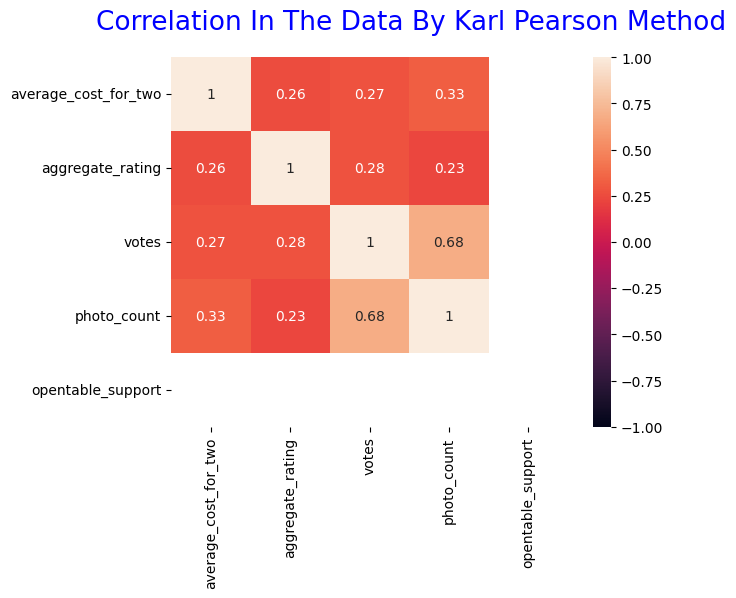

In [39]:
plt.suptitle('Correlation In The Data By Karl Pearson Method', size = 19, color = 'Blue')
sns.heatmap(data = data.corr(numeric_only= True), vmax = 1, vmin = -1, annot= True)

<a id='outliers'> </a>
## 8. Detect outliers

**1. Plot the boxplot for numeric data**

In [47]:
num_cols = ['average_cost_for_two', 'aggregate_rating', 'votes', 'photo_count']

<Figure size 640x480 with 0 Axes>

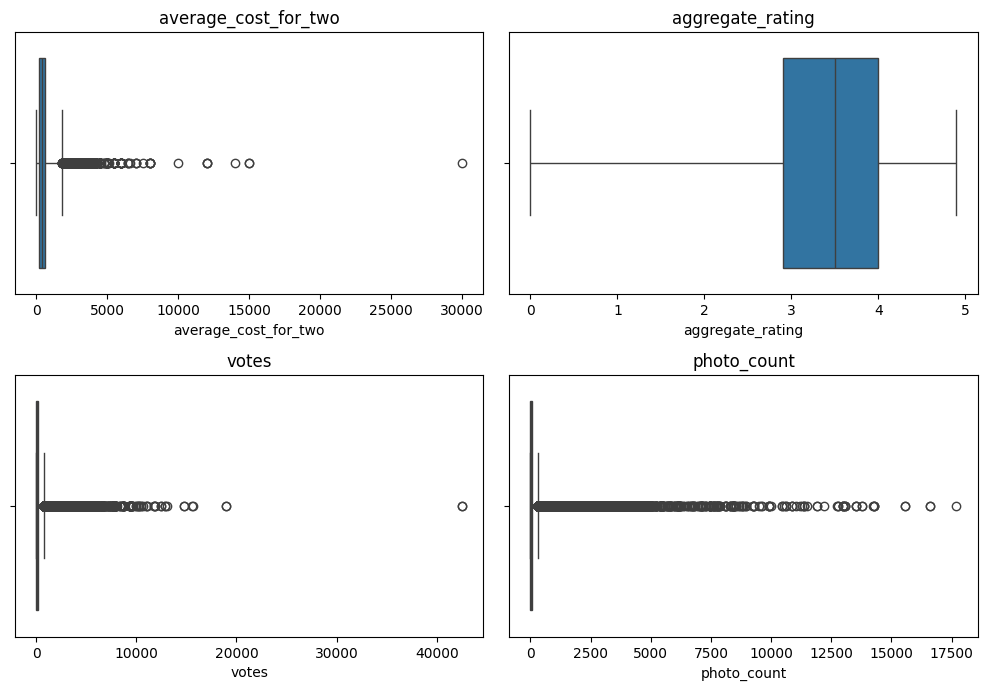

In [50]:
t = 1
plt.suptitle('Boxplot for Numeric Columns', size = 19, color = 'Blue')
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(x = data[i], whis = 3)
    plt.title(i)
    t += 1

plt.tight_layout()
plt.show()

**2. Note the variables for which outliers are present**

In [52]:
outlier_cols = ['average_cost_for_two', 'votes', 'photo_count']

for i in outlier_cols:
  q3, q1 = data[i].quantile([0.75,0.25])
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  ll = q1 - 1.5*iqr

  data[i] = data[i].apply(lambda x : ul if x > ul else ll if x < ll else x)


**3. Plot the boxplot to recheck for outliers**

<Figure size 640x480 with 0 Axes>

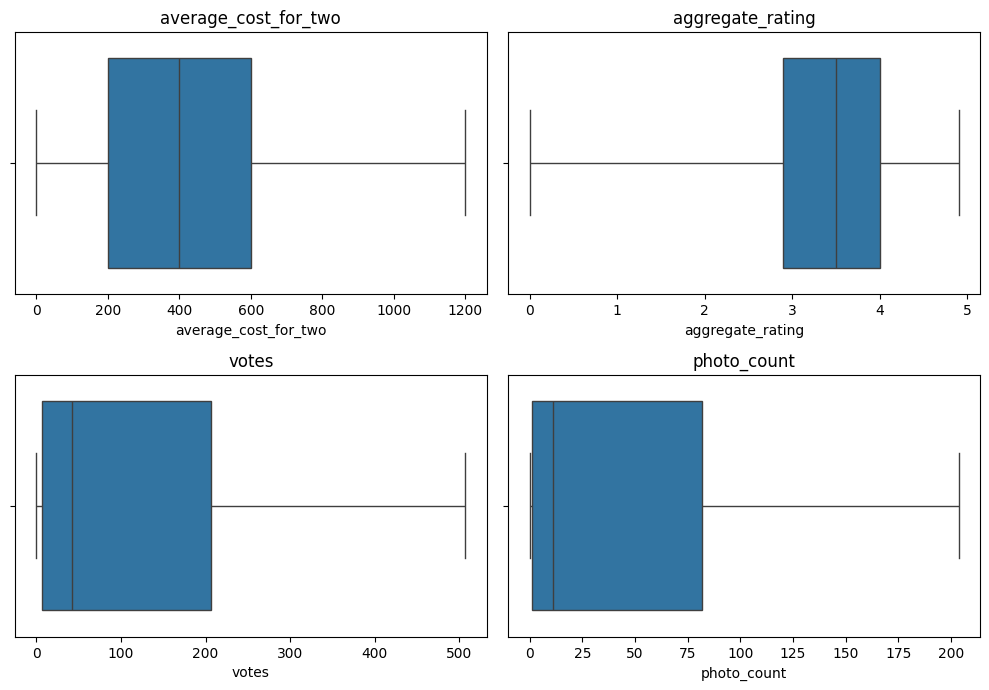

In [53]:
t = 1
plt.suptitle('Boxplot for Numeric Columns', size = 19, color = 'Blue')
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(x = data[i], whis = 3)
    plt.title(i)
    t += 1

plt.tight_layout()
plt.show()

All the outliers weather it will be of positive or negative in Nature were capped to upper and lower limit respectively

<a id='region'> </a>
## 9. Create a new variable 'region'


In [54]:
data['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad', 'Patiala',
       'Patna', 'Puducherry', 

<a id='more'> </a>
## 10. Bivariate and Multi Variate Analysis

As The Aim of Zomato is to increase their Rating target Column will be Aggregate rating so we will perform further analysis accordingly

<Figure size 640x480 with 0 Axes>

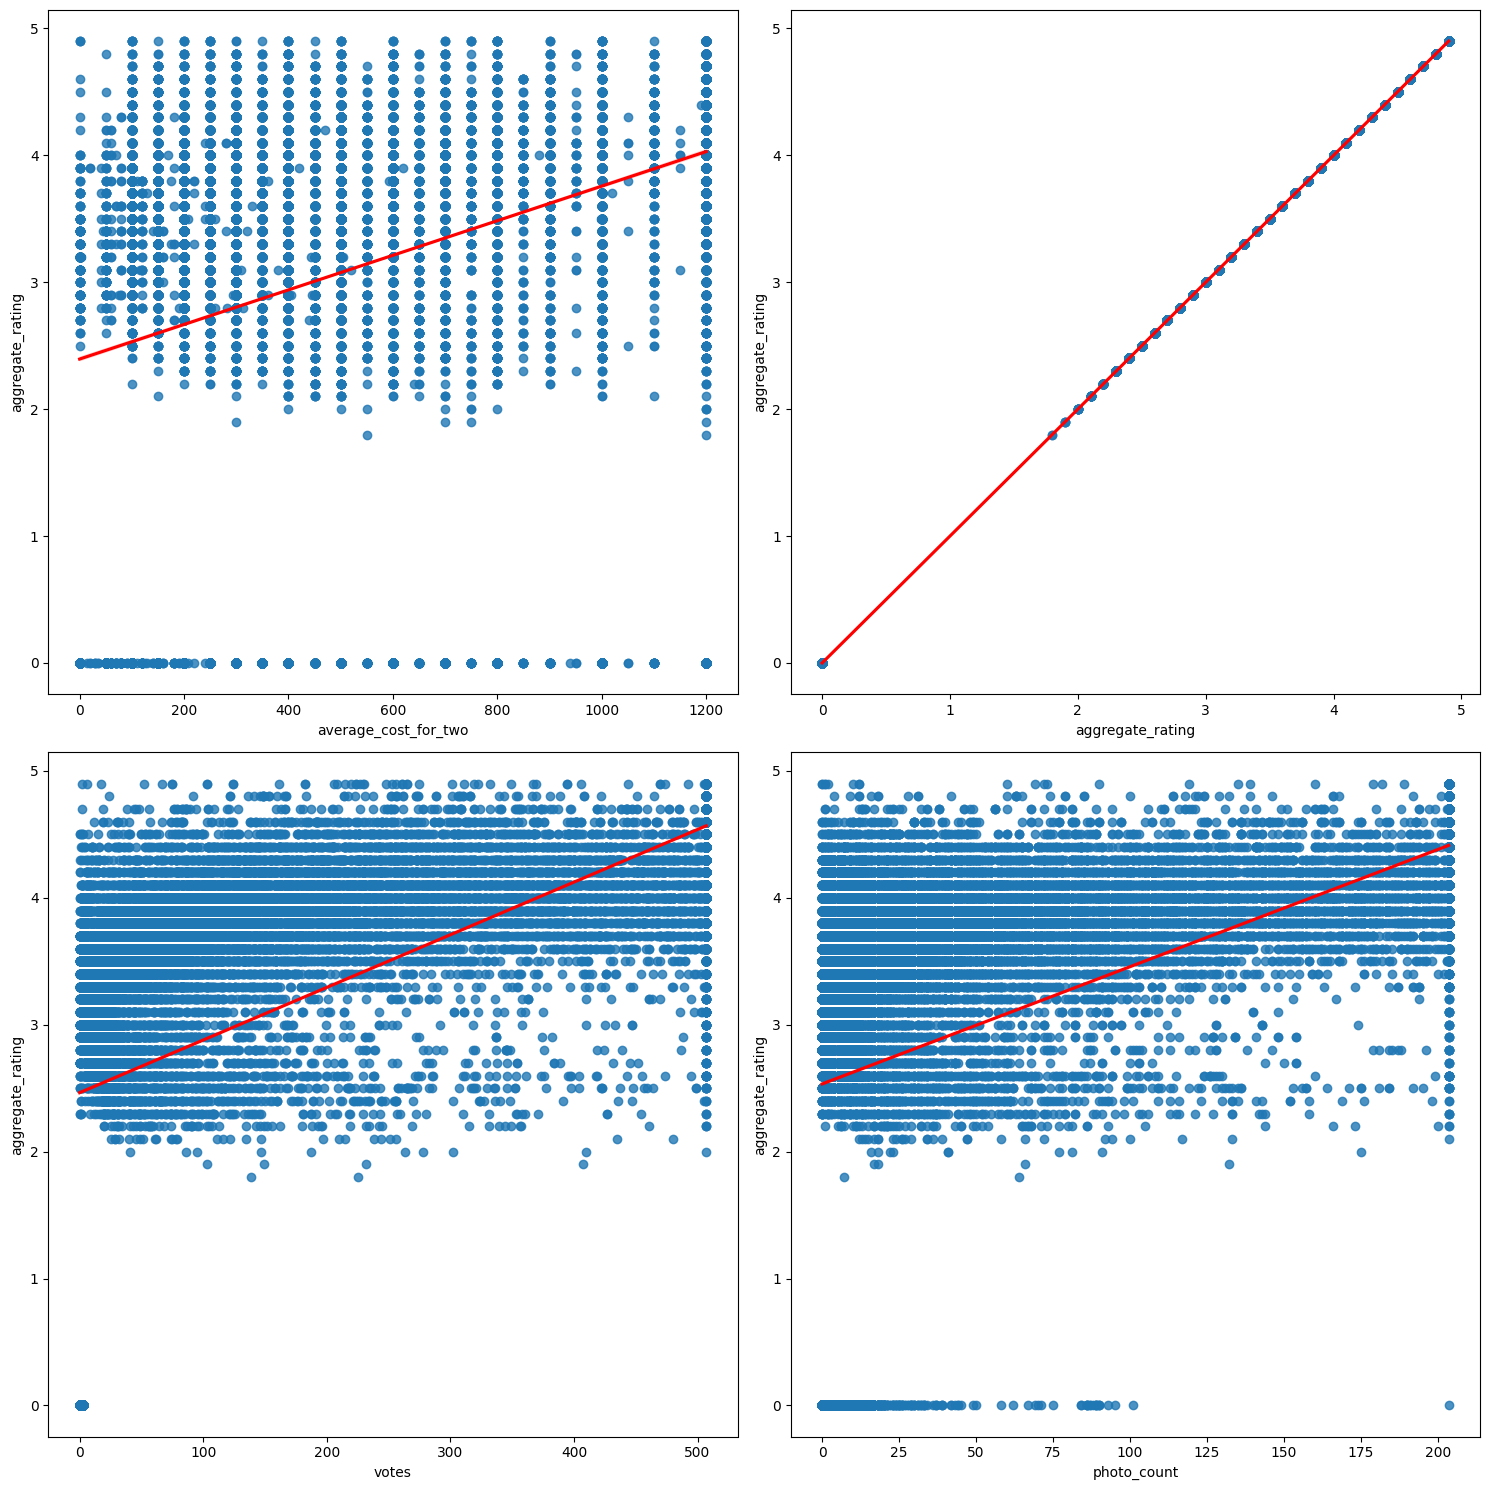

In [57]:
t = 1
plt.suptitle('Bivariate Analysis Of Numerical - Numerical Data')
plt.figure(figsize=(15,15))
for i in num_cols:
  plt.subplot(2,2,t)
  sns.regplot(data = data, x = i , y = 'aggregate_rating',   line_kws={"color": "red"})
  t += 1
plt.tight_layout()
plt.show()

Inferences



1.   Rating Increase as the average cost for two people increase in short expensive restraunt have good ratings


2.   As more People votes Rating is Increasing simulataneously


3. Rating is also affected by Photo Count People Take more Photos in Good Restraunt



In [58]:
data.columns

Index(['res_id', 'name', 'establishment', 'city', 'locality', 'cuisines',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'delivery', 'takeaway'],
      dtype='object')

In [60]:
cat_cols = [ 'name', 'establishment', 'city', 'locality', 'cuisines',
        'price_range', 'highlights',
       'rating_text', 'delivery', 'takeaway']

<Figure size 640x480 with 0 Axes>

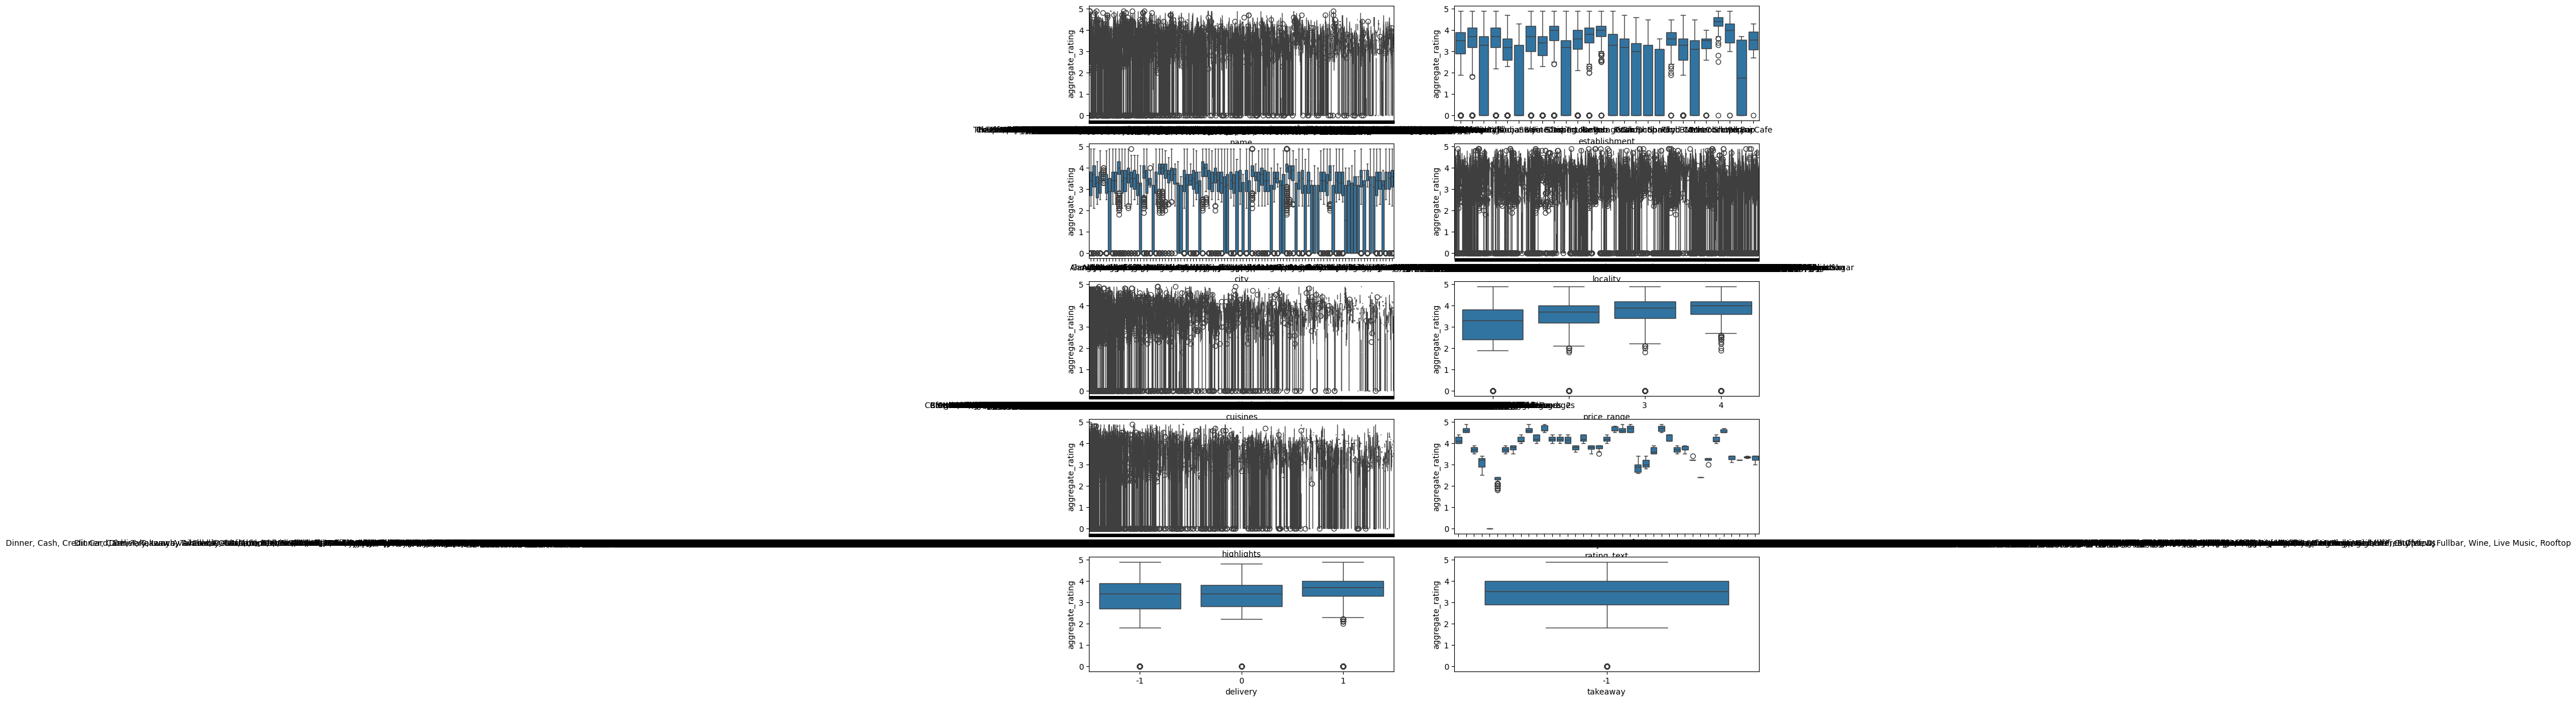

In [61]:
t = 1
plt.suptitle('Bivariate Analysis Of Numerical - Numerical Data')
plt.figure(figsize=(15,15))
for i in cat_cols:
  plt.subplot(5,2,t)
  sns.boxplot(data = data, x = i , y = 'aggregate_rating')
  t += 1
plt.tight_layout()
plt.show()